# Final Take-home exam
### YourUserID: xxxxxxxx

## General
The instruction for the final exam for CS4414 is included in this Jupyter Notebook. Some basic rules:

* You **are allowed** to use any document and source on your computer and look up documents on the internet.
* You or **not allowed** to share documents, or communicate in any other way with people about the final during the 24hr period of the take home final. Afterwards, you are not allowed to share the final, or talk about its content, with students who still have to take a make-up final  
* All the code you are using from previous Assignments or Labs needs to be included in the notebook.
* Most questions also require a written answer. The answer to these questions should be given in full English sentences.
* All Figures should have a x- and y-axis label.
* The Final exam needs to be submitted on OWL (Test + Quizzes) within 4 hrs of the time you first assessed this document. If you have accomodation officially approved by student counceling, you may have extra time.  

## Data set 
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk. 

### Source
The dataset (framingham.csv) is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient went on to develop coronary heart disease (CHD) in a 10 year period. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

### Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

* male: Indicator variable for biological sex (1:male 0:female)
* age: Age of the patient in years 
* education: Education level. Ordinal variable.c
* currentSmoker: whether or not the patient is a current smoker (1:yes 0:no)
* cigsPerDay: the number of cigarettes that the person smoked on average in one day
* BPMeds: whether or not the patient was on blood pressure medication (1:yes 0:no)
* prevalentStroke: whether or not the patient had previously had a stroke 
* prevalentHyp: whether or not the patient was hypertensive
* diabetes: whether or not the patient had diabetes
* totChol: total cholesterol level
* sysBP: systolic blood pressure
* diaBP: diastolic blood pressure
* BMI: Body Mass Index
* heartRate: heart rate (beats per minute)
* glucose: glucose level
* TenYearCHD: 10 year risk of coronary heart disease (1: developed signs of CHD in 10 year period, 0: did not develop CHD) 

## Task 1: Logistic regression (29pts)
### Question 1 (2pt)
Load the Data set framingham.csv *discarding all rows in the data frame that include any NaNs*. 

Split the data into equals-sized training and test sets (using a random_state = 0). 

How many observations do you have in your training set?

### Question 2  (6pts)
What is the baseline rate of the 10-year risk of CHD in the test sample? 

What is the baseline performance for the following evaluation criteria - i.e. the expected test performance of a classifier that always predicts 0? 

* Accuracy
* F1-score
* Specificity 
* Sensitivity
* Balanced accuracy

### Question 3 (8pts)
Using the training data, build a Logisitic regression model (without regularization) based on the demographic variables (male, age, education) only. Using 10-fold cross-validation on the training set, report the performance of this model using a suitable evaluation (scoring) criterion. 
Written answer: Justify your choice of evaluation criterion. Mention at least 2 other evaluation criteria and explain why these are not suitable, or not as good. 

### Question 4 (6pts)
By dropping one variable at a time from the model from Question 3, determine which of the 3 variables is the most crucial variable in the predictive model. Which variable could most likely be excluded? 

### Question 5 (7pts)
Combine all variables (except the one you want to predict!) into a Logistic regression model without regularization. Using the training set only, determine the average cross-validated log likelihood of the model on the training data, using 10-fold crossvalidation. 

Hint: The log-likelihood for a single observation $y$ and a predicted probability $\hat{y}$ is 
$ log P(y|\hat{y})= y log(\hat{y}) + (1-y) log(1-\hat{y})$. There is a sklearn scoring method that calculates this quantity:
https://scikit-learn.org/stable/modules/model_evaluation.html

## Task 2: Regularized Logisitic regression model (27pts) 

### Question 1 (8pts)
Use L1 regularization to determine the best set of variables to include in a predictive model.
Add a penalty of $\lambda \sum_{i}{|\beta_i|_1}$ ($\beta_i$ are your regression coefficients) to the Logistic regression model. Vary the regularization parameter $\lambda$ between 0.2 and 200, evenly spaced in log-space. 

Apply all necessary preprocessing steps to your variables to be able to compare meanfully  between different predictors in the model. 

Plot the coefficient path, i.e. the size of the regression coefficients relative to the size of the the regularization paramter. Which two variables are the two most important predictors of 10-year risk of CHD?   

### Question 2 (7pts)
Using the same model and the range of regularisation parameters as in T2, Q1, determine the 10-fold crossvalidated performance for different values of the L1-regularisation parameter. Use the cross-validated log-likelihood of the data under the model as evaluation criterion. (If you couldn't calulcate the log-likelihood in Task 1, Question 5, use another suitable evaluation criterion).   

Make a plot of the crossvalidated log-likelihood against $log(\lambda)$. Base on this criterion, what is the optional setting of the L1-regularization parameter? At this value, which variables contribute to the prediction? 


### Question 3 (6pts)
Using the best lambda that you found, fit the L1-regularized model to all the training data and then get the the predicted probability for each item of the test set. 

Plot the ROC curve for the test set and model.

Report the area under the ROC curve. 

### Question 4 (6pts)
Given the resulting ROC-curve, if you wanted your predictive model to have a sensitivity of more than 0.8, what is the best specificity you could achieve on the test set? 

Provide the 95% confidence interval on the specificity. Note that there are different ways of getting a valid confidence interval, including the normal approximation (central limit theorem) to the binomial distribution or bootstrap (see Lab, week 3 for hints). 

## Task 3: Deep learning (26pts)
In this task we are looking to see if we can beat the best logistic regression model, using "deep" learning.
### Question 1 (7 pts)
Build a simple linear model with 15 input units for the 15 predictor variables in the CHD data set and two output units for the two output classes (0: no CHD risk, 1: CHD risk). Use a LogSigmoid as your output non-linearity. 

Use the training data set (task 1, Question 1) to train the network:
* Z-standarize your input variables 
* Use the Cross-entropy loss as a training criterion (same as for logisitic regression) 
* Use Stochastic gradient descent optimizer with a learning rate of 0.01
* Run the optimization for 10000 iterations and record the loss for each iteration 
* Make a plot of iterations vs. loss 

### Question 2 (8pts)
Use the trained network to make a prediction for the test set. Report an area under the ROC curve for the test data set. 

HINT: To obtain a probability from the output of the network, take the logistic function of the difference between the activities of the two output units. Remember the output unit 0 is high when the model "thinks" is class is 0 and the output unit 1 is higher when the model "thinks" the class is 1.   

### Question 3 (6pts)
Now add a hidden layer with 50 units into the network. Use a LogSigmoid non-linearity for the hidden layer. Leave all the other parameters the same as for Question 1. Again, plot the loss as a function of the iteration. 

### Question 4 (5pts)
As for Question 2, report the area under the ROC curve for this network on the test set. 

Written answer: What do you conclude? 

## Task 4: Trees (18pts)
The code below generates and shows 4 decision trees trained on a classification problem where the feature matrix $X$ has shape $10,000 \times 10$  and the outcome has 4 classes labaled 0 through 3.  The feature names are $X_j \, j = 1 \dots 10$.  Assume each tree has been trained on a bootstrapped version of the training data and that every feature was available to the tree at every split.

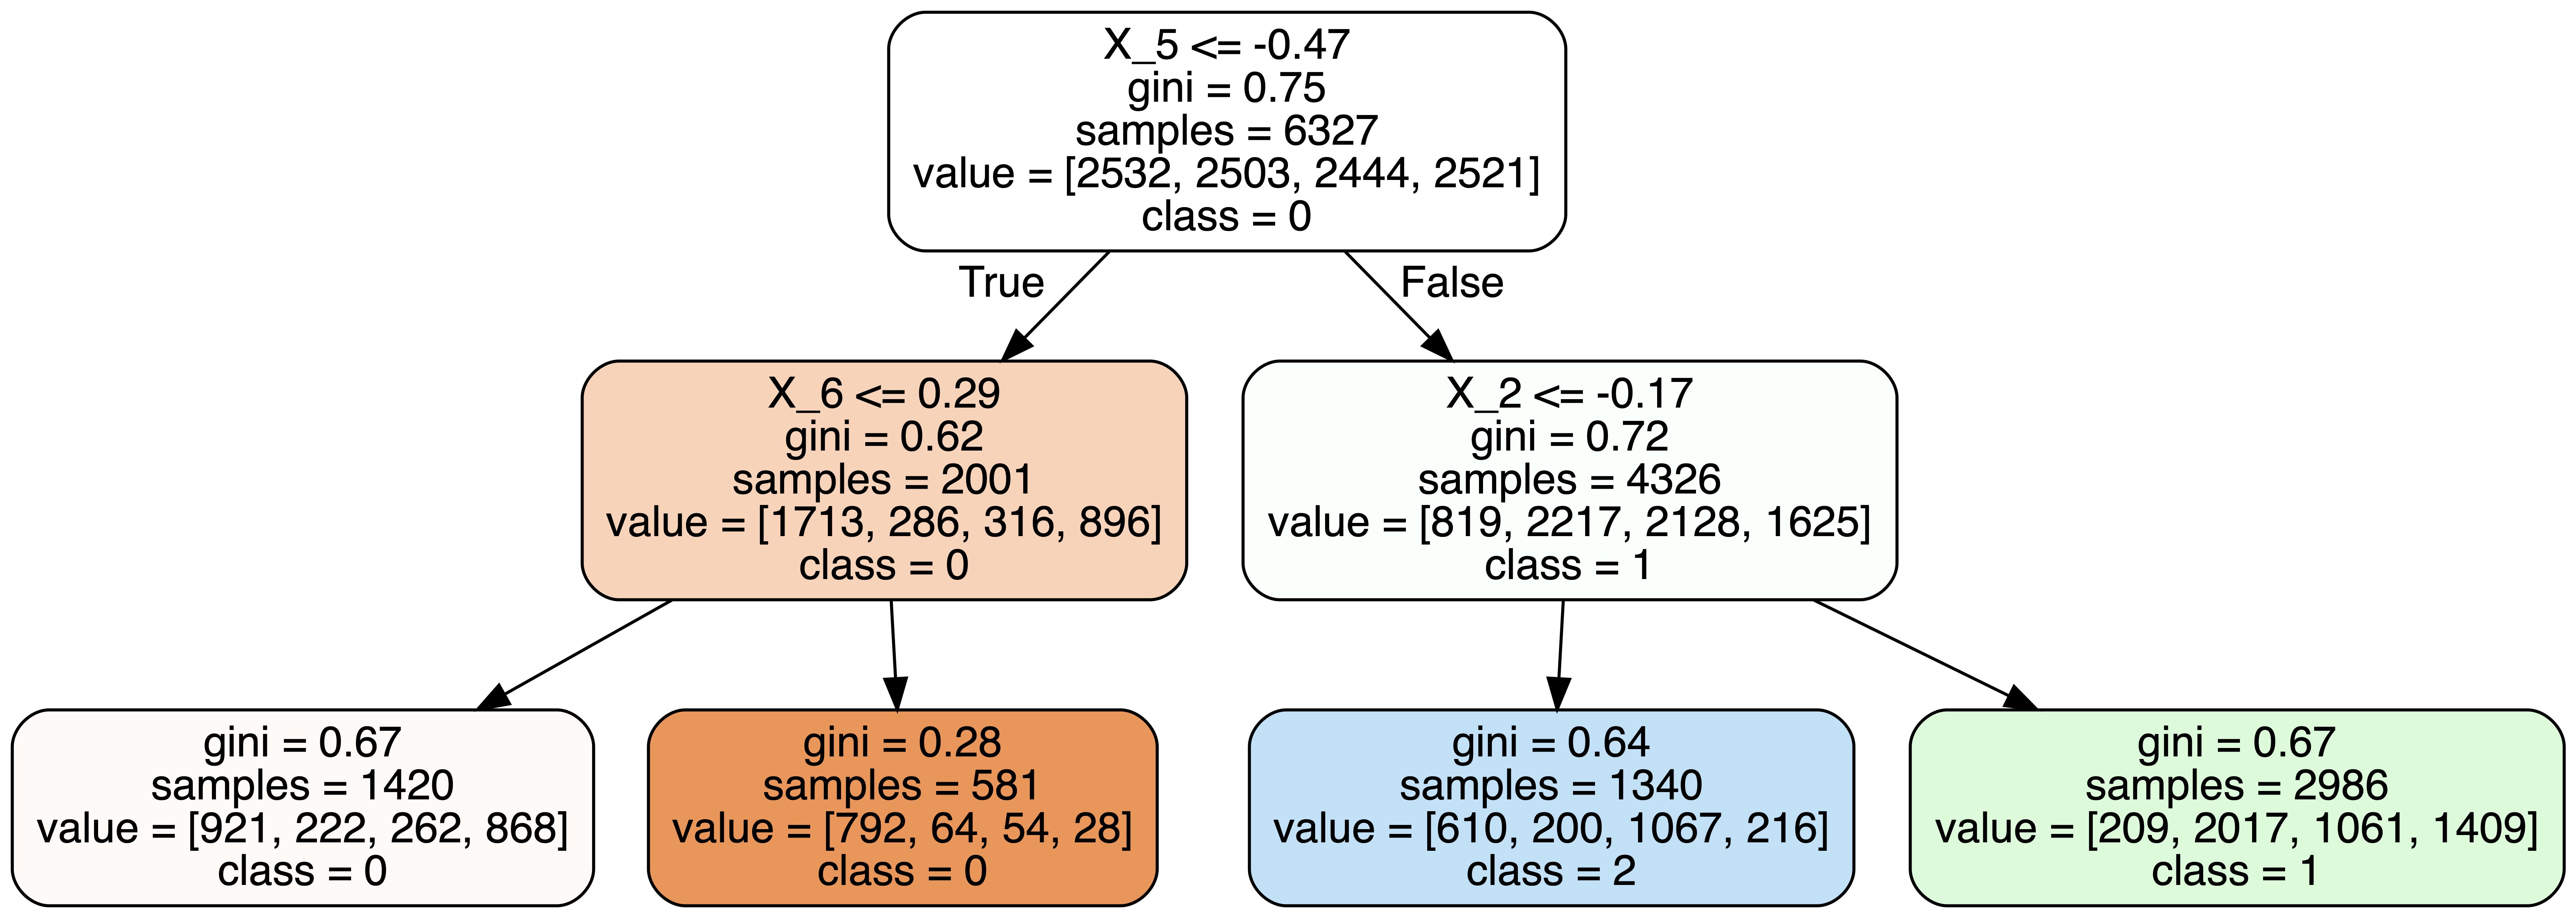

In [4]:
from IPython.display import Image
Image(filename = 'tree_0.png')
#Outcome : 2

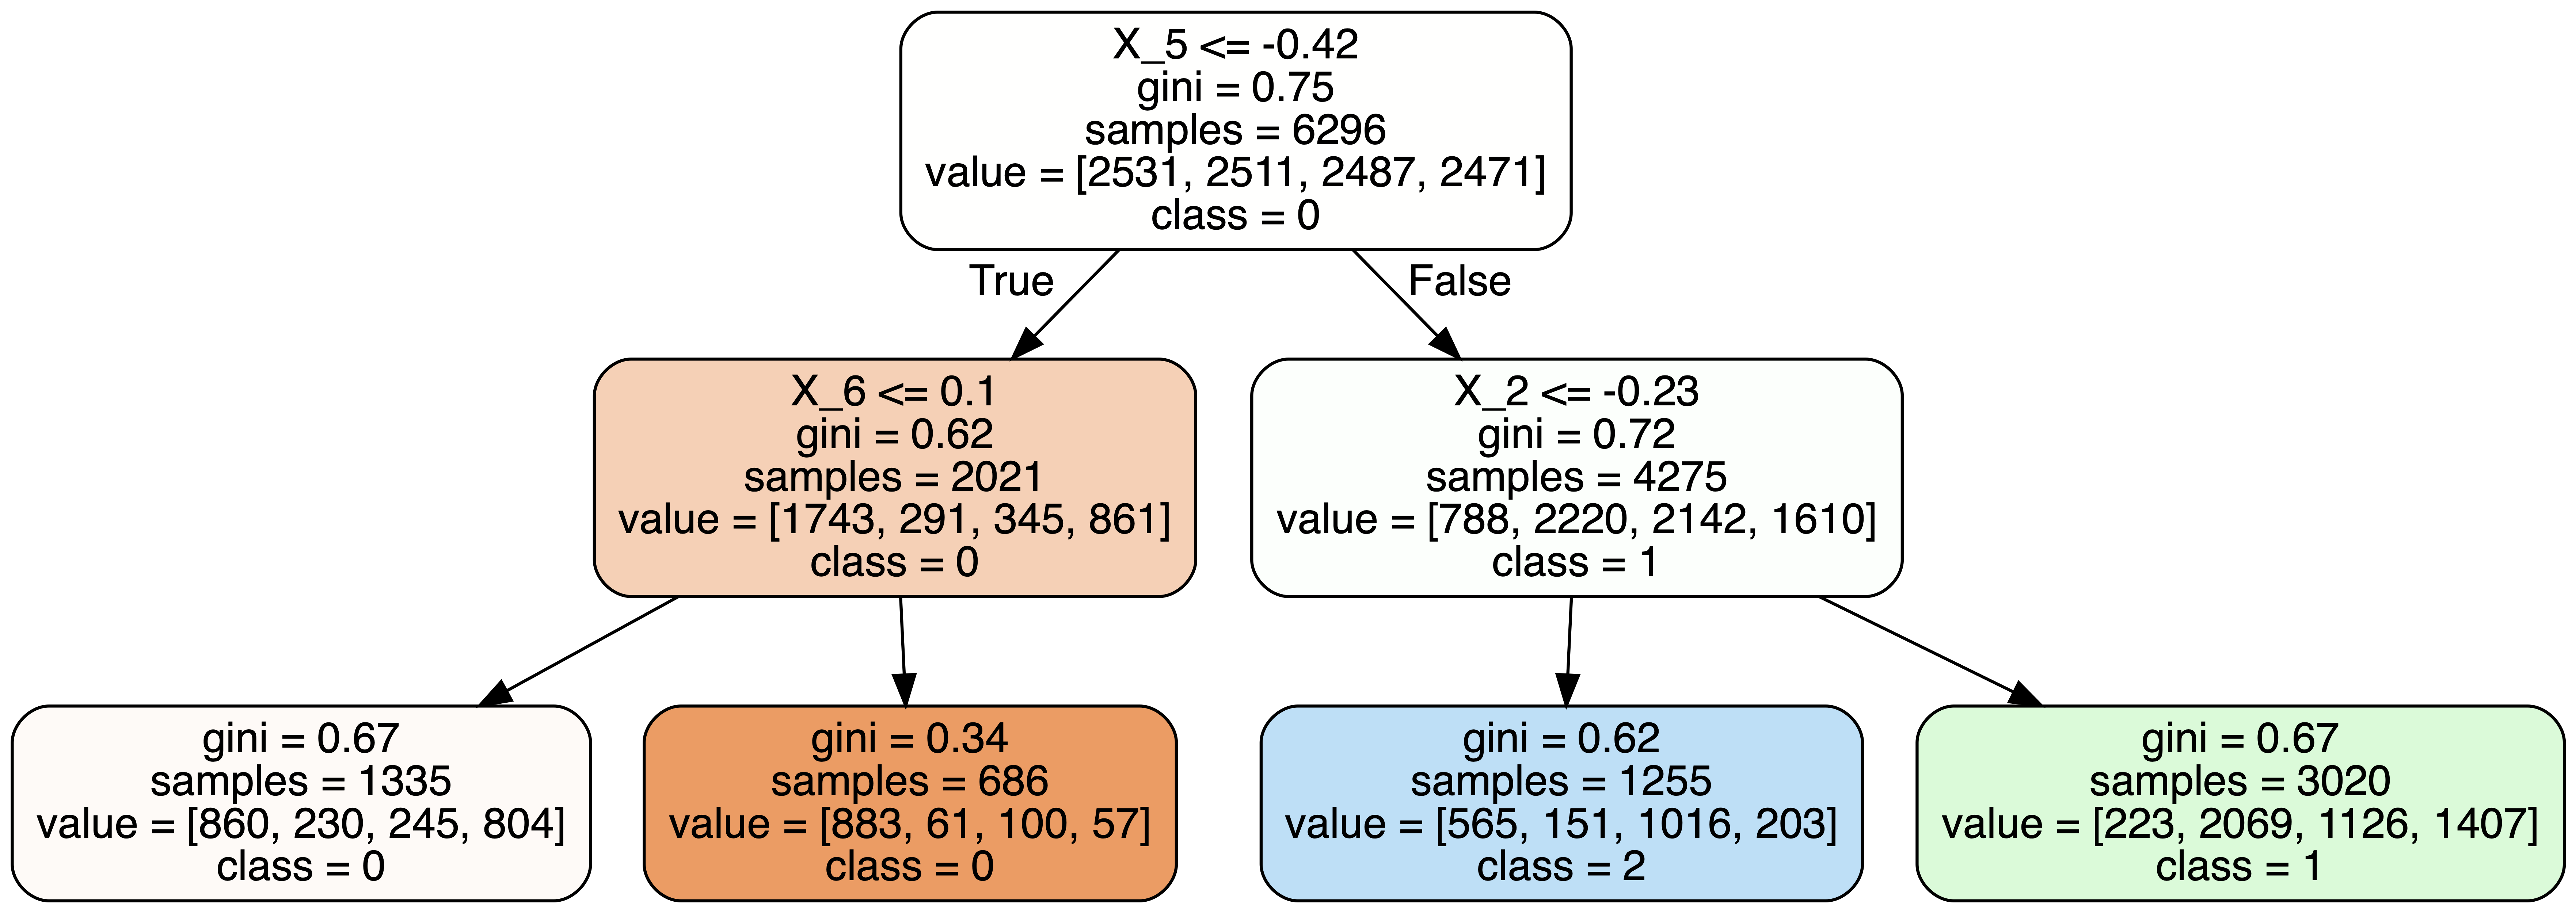

In [5]:
Image(filename = 'tree_1.png')
# Outcome: 1

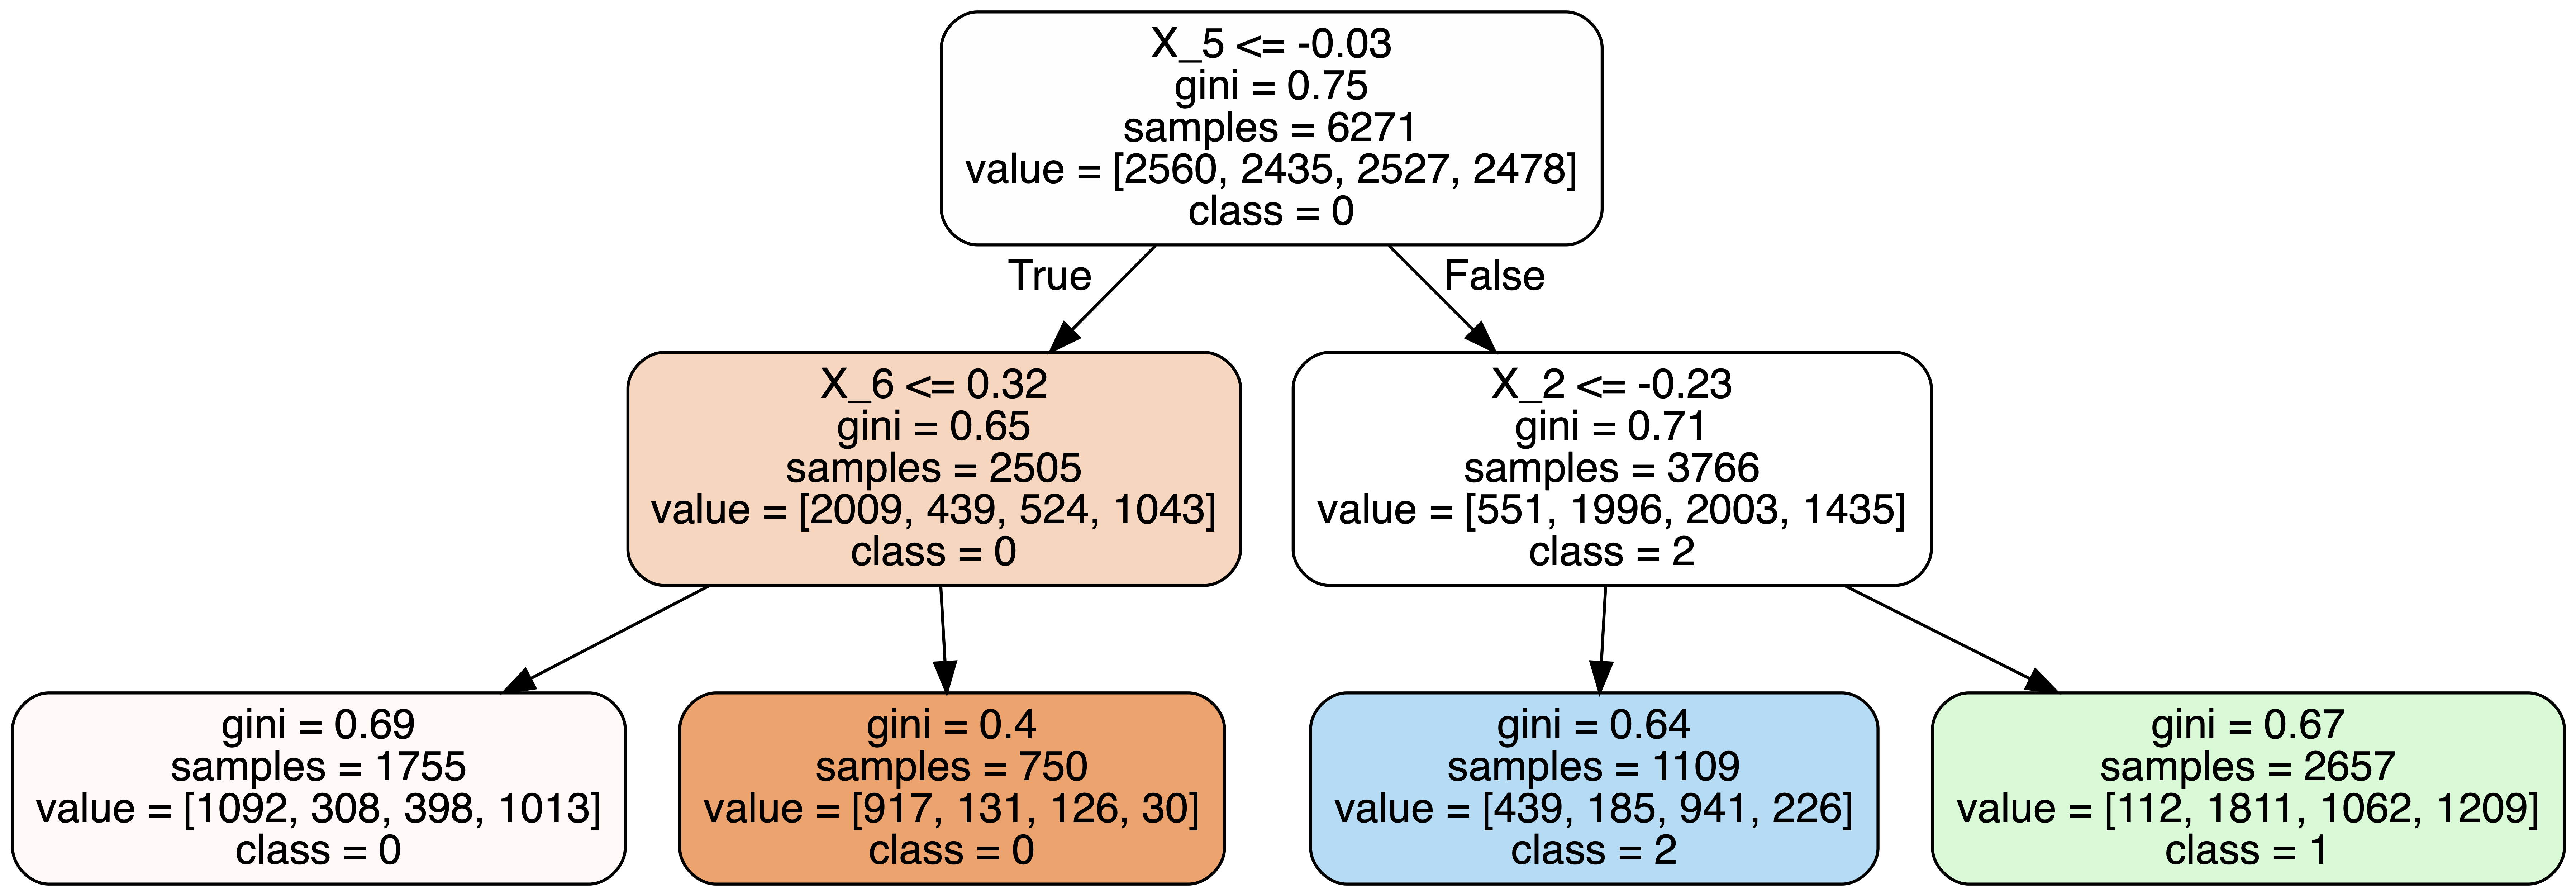

In [6]:
Image(filename = 'tree_2.png')
#Outcome: 0

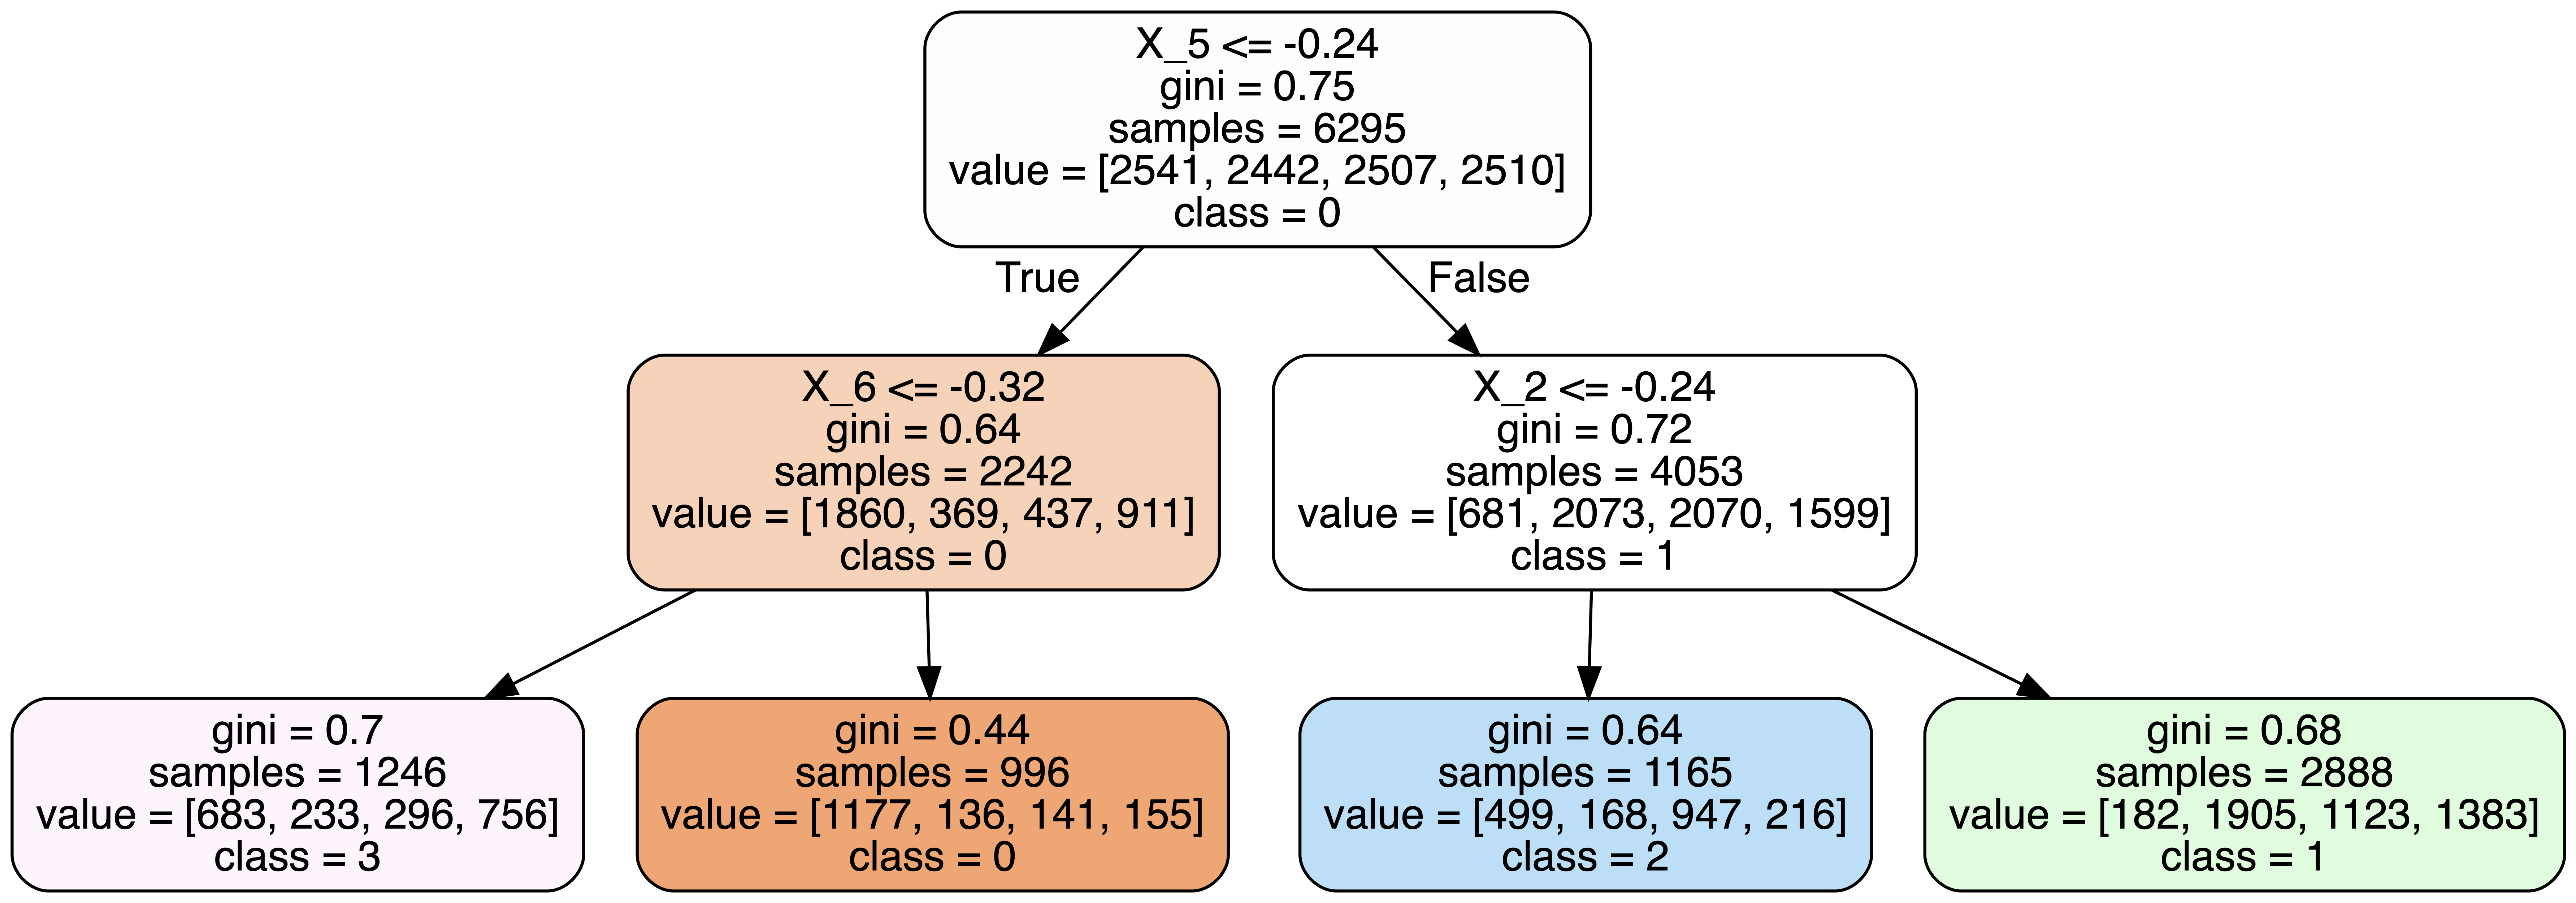

In [7]:
Image(filename = 'tree_3.png')
#Outcome = 0

### Question 1 (4 pts)  
How would each tree classify the following observation? 

$$\mathbf{x} = \begin{bmatrix} 
1.03\\
-0.20\\
2.00\\
-.99\\
-0.30\\
0.15\\
-.11\\
5.10\\
-0.77\\
0.90\\
\end{bmatrix}$$



### Question 2 (5pts) 
Together these trees form an ensemble.  What kind is the name of that model?  What are the advantages to using this model over decision trees?  What are the problems with this model?  How would the ensemble classify the observation in part 1?


### Question 3 (4pts) 
Write python code that would fit the model described above if you were to be given the training data (Xtrain,ytrain).


### Question 4 (5pts) 
Suppose you trained this model and were unsatisfied with the performance.  What would be the next tree based model you would try?  Explain how this model works as if you were talking to a fellow data scientist and why it improves upon the model in part 2 (in theory). In your explanation, highlight similarities and differences between your chosen model and the model in part 2.